In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.linear_model import LinearRegression
from joblib import dump,load

from sklearn.metrics import mean_squared_error,mean_absolute_error

import seaborn as sns

from numpy.linalg import inv


ModuleNotFoundError: No module named 'seaborn'

# Linear Regression

### a. Dataset creation:

In [ ]:
X = np.zeros((1500,2))
y = np.zeros(1500)

b0,b1,b2 = 1.414,1.732,1.384

In [3]:
for i in range(1500):
    X[i,0] = np.random.standard_normal(size = 1)
    X[i,1] = np.random.standard_normal(size = 1)

    y[i] = b0 + b1*X[i,0] + b2*X[i,1]

df = pd.DataFrame({"x1":X[:,0],"x2":X[:,1],"y":y})

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

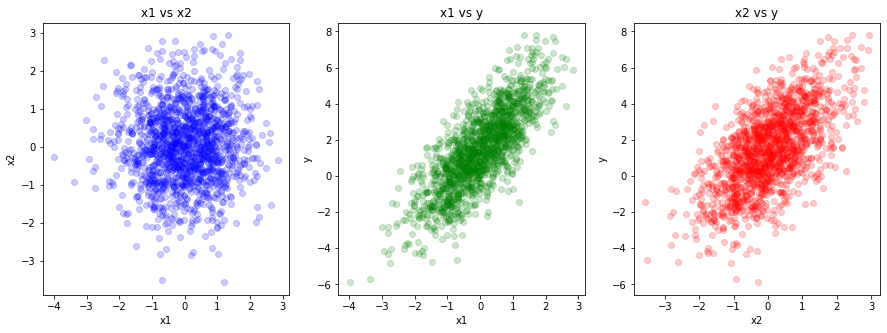

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))

def plot_graph(ax,x,y,xlabel,ylabel,title,a=0.2,c='red'):
    ax.scatter(x,y,alpha = a,color=c)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


plot_graph(ax1,df["x1"],df["x2"],"x1","x2","x1 vs x2",0.2,'blue')
plot_graph(ax2,df["x1"],df["y"],"x1","y","x1 vs y",0.2,'green')
plot_graph(ax3,df["x2"],df["y"],"x2","y","x2 vs y")

### b. Modelling:

In [33]:
reg = LinearRegression()

reg.fit(X_train,y_train)

P1 = dump(reg,'P1.joblib')


In [34]:
eta = 0.01
theta = np.zeros((3,1))#initialise with zeros
iters = 2000


def compCost(X, y, theta):
    tempval = (np.dot(X, theta) - y)
    return np.sum(np.power(tempval, 2)) / (2*X.shape[0])


def gradDes(X, y, theta, eta, iters):
    iterst = []
    cost = []
    for i in range(iters):

        #### Fill in here the update step of gradient descent
        grad_theta = (-2*X.T@(y - X@theta))/X.shape[0]
        theta = (theta - eta*grad_theta)
        
        iterst.append(i)
        cost.append(compCost(X, y, theta)) #appending cost values
        
    return theta,iterst,cost




theta :  [[1.414]
 [1.732]
 [1.384]]


Text(0, 0.5, 'Cost values')

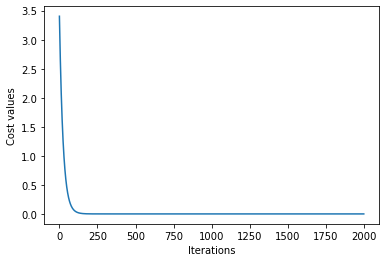

In [35]:
X_train_SGD = np.append(np.ones((1200,1)),X_train,axis=1)
X_test_SGD  = np.append(np.ones((300,1)),X_test,axis=1)
y_train_SGD = y_train.reshape((1200,1))

P2,iterst,cost = gradDes(X_train_SGD, y_train_SGD, theta, eta, iters)
print("theta : ",P2)
plt.plot(iterst,cost)
plt.xlabel("Iterations")
plt.ylabel("Cost values")

### c. Metrics:

In [36]:
P1 = load('P1.joblib')
y_skl_pred = P1.predict(X_test)
y_SGD_pred = np.dot(X_test_SGD,P2).reshape(300)

In [40]:
mse_p1 = mean_squared_error(y_test, y_skl_pred)
mse_p2 = mean_squared_error(y_test, y_SGD_pred)

mae_p1 = mean_absolute_error(y_test,y_skl_pred)
mae_p2 = mean_absolute_error(y_test,y_SGD_pred)

NRMSE_skl = (mse_p1**0.5 - np.min(y_skl_pred))/(np.max(y_skl_pred) - np.min(y_skl_pred))
NRMSE_SGD = (mse_p2**0.5 - np.min(y_SGD_pred))/(np.max(y_SGD_pred) - np.min(y_SGD_pred))
print("for SKLEARN:")
print("Mean Absolute Error:                 ",mae_p1)
print("Root Mean Square Error:              ",mse_p1**0.5)
print("Normalised Root Mean Square Error:   ",NRMSE_skl)
print()

print("For GRADIENT DESCENT:")
print("Mean Absolute Error:                 ",mae_p2)
print("Root Mean Square Error:              ",mse_p2**0.5)
print("Normalised Root Mean Square Error:   ",NRMSE_SGD)

for SKLEARN:
Mean Absolute Error:                  1.1696199564426024e-15
Root Mean Square Error:               1.4910385465674955e-15
Normalised Root Mean Square Error:    0.34518756068467726

For GRADIENT DESCENT:
Mean Absolute Error:                  8.7805226052969e-15
Root Mean Square Error:               1.078948397866148e-14
Normalised Root Mean Square Error:    0.34518756068467815


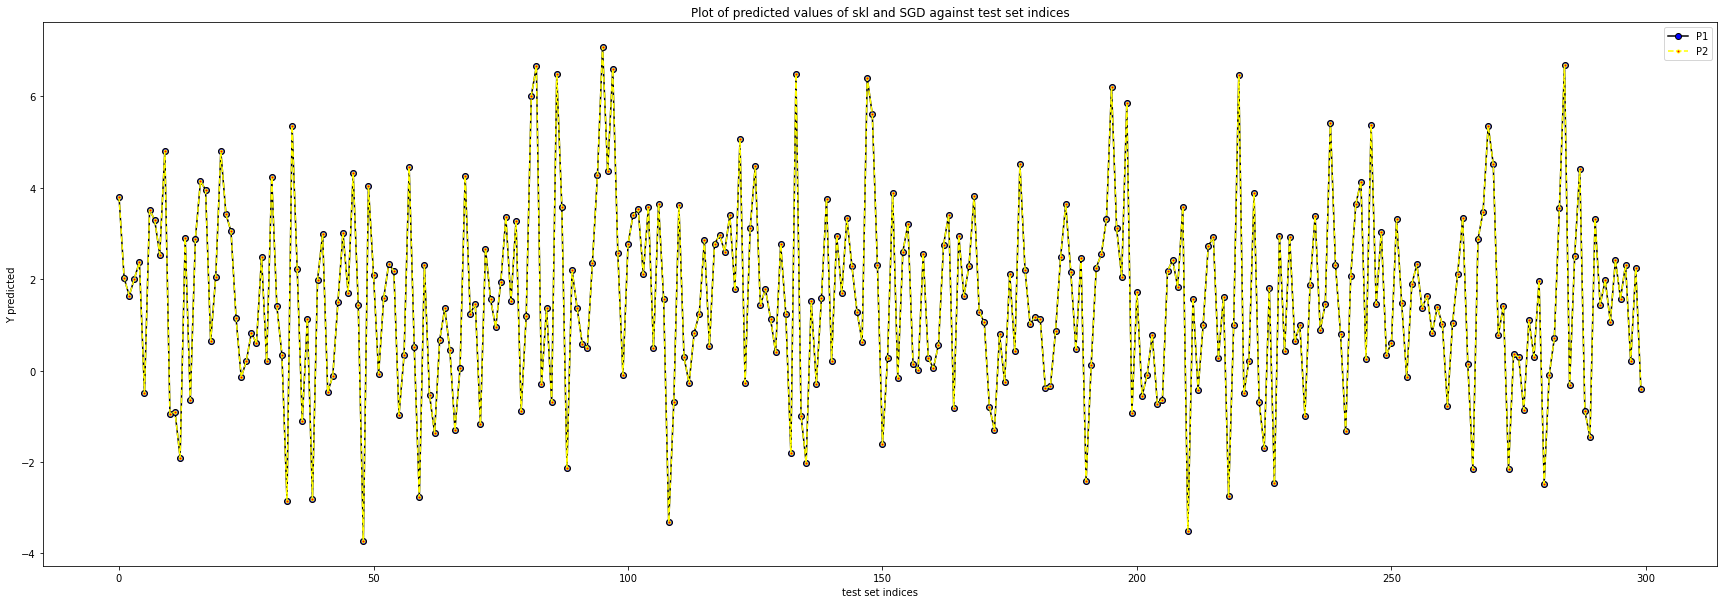

In [61]:
test_set_indices = [i for i in range(y_test.shape[0])]

plt.figure(figsize=(30,10))
plt.plot(test_set_indices, y_skl_pred, marker='o',color='black',markerfacecolor='b',label='P1',alpha = 1)
plt.plot(test_set_indices, y_SGD_pred, marker='.',color='yellow',markerfacecolor='red',label='P2',alpha=1,linestyle='--')
plt.xlabel('test set indices')
plt.ylabel('Y predicted')
plt.title('Plot of predicted values of skl and SGD against test set indices')
plt.legend(loc='best')
plt.show()

In [163]:
errors = []
errors.append(y_test - y_skl_pred)
errors.append(y_test - y_SGD_pred)

fig = plt.figure(figsize=(10,7))
# ax = fig.add_axes(0, 1)


# print(errors_p1.shape," ",errors_p2.shape)
fig = sns.boxplot(errors)
fig.set_xticklabels(['P1',"P2"])
plt.show()

C:\Users\Swarnarup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 720x504 with 0 Axes>

In [162]:
beta = np.array((b0,b1,b2)).T

def_p2 = beta - P2.reshape(3)
print("Differences between the ground truth β and the obtained β values in P2", def_p2)
print()

theta_p1= np.empty((3))
theta_p1[0] = (P1.intercept_)
theta_p1[1]=(P1.coef_[0])
theta_p1[2]=(P1.coef_[1])

def_p1 = beta - theta_p1
print("Differences between the ground truth β and the obtained β values in P1", def_p1)
print()

Differences between the ground truth β and the obtained β values in P2 [ 5.77315973e-15  5.77315973e-15 -6.21724894e-15]

Differences between the ground truth β and the obtained β values in P1 [ 2.22044605e-16  1.33226763e-15 -4.44089210e-16]



# Linear Regression II

In [86]:
df = pd.read_csv("prostate_data.txt",delim_whitespace=True)
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [146]:
std_df = (df.iloc[:,:-2]-df.iloc[:,:-2].mean())/df.iloc[:,:-2].std()
std_df.insert(0,"Intercept",[1]*df.shape[0])
std_df["lpsa"]=df["lpsa"]
std_df

,Intercept,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,1,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.430783
2,1,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519
3,1,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-0.162519
4,1,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519
5,1,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.371564
...,...,...,...,...,...,...,...,...,...,...
93,1,1.255920,0.577607,0.555266,-1.024706,1.892548,1.073572,0.342627,1.262889,4.385147
94,1,2.096506,0.625489,-2.668323,-1.024706,1.892548,1.679542,0.342627,0.553770,4.684443
95,1,1.321402,-0.543304,-1.593794,-1.024706,1.892548,1.890377,0.342627,-0.509907,5.143124
96,1,1.300290,0.338384,0.555266,1.004813,1.892548,1.242632,0.342627,1.972007,5.477509


In [147]:
df_train=std_df[df["train"]=="T"]
df_test=std_df[df["train"]=="F"]
df_train

,Intercept,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,1,-1.637356,-2.006212,-1.862426,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.430783
2,1,-1.988980,-0.722009,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519
3,1,-1.578819,-2.188784,1.361163,-1.024706,-0.522941,-0.863171,0.342627,-0.155348,-0.162519
4,1,-2.166917,-0.807994,-0.787896,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,-0.162519
5,1,-0.507874,-0.458834,-0.250631,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,0.371564
...,...,...,...,...,...,...,...,...,...,...
91,1,1.609063,1.103786,0.555266,-1.024706,-0.522941,-0.863171,-1.042157,-0.864467,4.029806
92,1,1.003621,0.113497,-0.384948,0.860016,1.892548,-0.863171,0.342627,-0.332628,4.129551
93,1,1.255920,0.577607,0.555266,-1.024706,1.892548,1.073572,0.342627,1.262889,4.385147
94,1,2.096506,0.625489,-2.668323,-1.024706,1.892548,1.679542,0.342627,0.553770,4.684443


In [152]:
# W = (X^T*X)^-1*X^T*Y
X = np.array(df_train.values)[:,:-1]
Y = np.array(df_train['lpsa']).reshape((67,1))

W = (inv(X.T@X)@X.T@Y).reshape(9)
Literature = [2.46,0.68,0.26,-0.14,0.21,0.31,-0.29,-0.02,-0.27]

op_df_dict = {'coefficient':std_df.columns[:-1],'model':W,'literature':Literature}
op_df = pd.DataFrame(op_df_dict)

op_df

,coefficient,model,literature
0,Intercept,2.464933,2.46
1,lcavol,0.679528,0.68
2,lweight,0.263053,0.26
3,age,-0.141465,-0.14
4,lbph,0.210147,0.21
5,svi,0.305201,0.31
6,lcp,-0.288493,-0.29
7,gleason,-0.021305,-0.02
8,pgg45,0.266956,-0.27


In [153]:
y_act = np.array(df_test['lpsa'])
y_pred = np.dot(np.array(df_test.values)[:,:-1],W).reshape(30)

corr_mat = np.corrcoef(y_act,y_pred)
print(corr_mat)

[[1.        0.7107902]
 [0.7107902 1.       ]]


In [154]:
R_sq = corr_mat[0][1] ** 2
print("The Coefficient of Determination of Prediction is ",R_sq)

The Coefficient of Determination of Prediction is  0.5052227064162529
